In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [3]:
X.shape

(30, 1)

In [6]:
X = X.reshape(X.shape[1],X.shape[0])

In [7]:
X.shape

(1, 30)

In [8]:
Y.shape

(30,)

In [9]:
Y = Y.reshape(1,Y.shape[0])
Y.shape

(1, 30)

In [10]:
X

array([[ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]])

In [11]:
Y

array([[ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]])

In [12]:
train_size = 0.8
X_train = X[:,:int(0.8*X.shape[1])]
X_test = X[:,int(0.8*X.shape[1]):]
Y_train = Y[:,:int(0.8*Y.shape[1])]
Y_test = Y[:,int(0.8*Y.shape[1]):]

In [13]:
X_den = np.std(X_train)-np.mean(X_train)
X_add = np.mean(X_train)
Y_den = np.std(Y_train)-np.mean(Y_train)
Y_add = np.mean(Y_train)
inverse_cache = (X_den, X_add, Y_den, Y_add)

In [14]:
X_train = (X_train-X_add)/X_den
X_test =  (X_test-X_add)/X_den
X_train

array([[ 1.38373045,  1.29564151,  1.20755257,  0.98733021,  0.89924127,
         0.59092998,  0.54688551,  0.45879657,  0.45879657,  0.23857422,
         0.15048527,  0.1064408 ,  0.1064408 ,  0.06239633, -0.11378155,
        -0.28995943, -0.37804837, -0.46613731, -0.73040414, -0.77444861,
        -1.12680437, -1.25893778, -1.61129354, -1.74342696]])

In [15]:
Y_train = (Y_train-Y_add)/Y_den
Y_test = (Y_test-Y_add)/Y_den
Y_train

array([[ 0.59095174,  0.44052521,  0.62628949,  0.4992753 ,  0.57893867,
         0.21172868,  0.13482744,  0.2598906 ,  0.04067384,  0.19973752,
         0.06757174,  0.23031826,  0.20482335,  0.20210506,  0.11376071,
        -0.03589857,  0.00594991, -0.36801196, -0.33019707, -0.60590598,
        -0.55763445, -0.7008926 , -0.76729336, -1.04153352]])

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1, 24)
(1, 6)
(1, 24)
(1, 6)


In [17]:
def forward_prop(X, params):
    W = params['W']
    b = params['b']
    
    Z = np.dot(W.T,X) + b
    return Z

In [18]:
def backward_prop(X,Y, Z):
    m = Y.shape[1]
    dZ = Z-Y
    dW = np.dot(dZ,X.T)/m
    db = np.sum(dZ)/m
    
    grads = {}
    grads['dW'] = dW
    grads['db'] = db
    
    return grads

In [19]:
def compute_cost(Y,Z):
    m = Y.shape[1]
    cost = np.sum(np.abs(Z-Y))/m
    return cost

In [20]:
def update_parameters(params, grads, alpha):
    dW = grads['dW']
    db = grads['db']
    W = params['W']
    b = params['b']
    W = W - alpha * dW
    b = b - alpha * db
    params['W'] = W
    params['b'] = b
    
    return params

In [21]:
def initialize_params(x, y):
    n_x = x.shape[0]
#     print("n_x = ", n_x)
    m = y.shape[1]
    W = np.random.randn(n_x,1)
    b = 0.
    params = {}
    params['W'] = W
    params['b'] = b
    
    return params

In [22]:
def train(X,Y,num_iter=1000, alpha=0.01):
    params = initialize_params(X,Y)
    costs = []
    for i in range(num_iter):
        
       
        y_hat = forward_prop(X, params)
        cost = compute_cost(Y, y_hat)
        costs.append(cost)
        grads = backward_prop(X,Y, y_hat)
        if(i%200==0):
            print(cost)
        params = update_parameters(params, grads, alpha)
    return params,costs

In [23]:
params = {}
params,costs = train(X_train, Y_train, 2000, 0.01)
params

1.2185198773932753
0.2870396662410886
0.12780206667506813
0.11108511110899454
0.11009560701933557
0.11014373446026186
0.11015433103641341
0.11015666416329432
0.11015717786516978
0.1101572909707274


{'W': array([[0.50034366]]), 'b': 1.0934540310240673e-17}

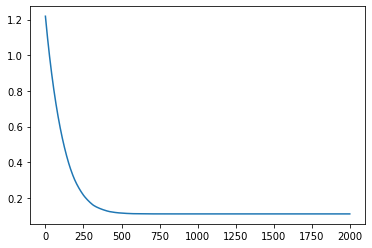

In [24]:
x_vals = np.arange(2000)
plt.plot(x_vals,costs)

In [26]:
type(X_train)

numpy.ndarray

In [25]:
x_vals =  X_train*inverse_cache[0]+inverse_cache[1]
x_train_vals = list(x_vals[0])
x_train_vals
x_vals

array([[1.1, 1.3, 1.5, 2. , 2.2, 2.9, 3. , 3.2, 3.2, 3.7, 3.9, 4. , 4. ,
        4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6. , 6.8, 7.1, 7.9, 8.2]])

In [28]:
def predict(X_test, params,inverse_cache):
    Z = np.dot(params['W'].T,X_test)+params['b']
    Y_hat = Z*inverse_cache[2] + inverse_cache[3]
    return Y_hat

In [29]:
y_vals = predict(X_train, params,inverse_cache)
y_train_vals = list(y_vals[0])
y_train_vals

[34717.94247825599,
 36728.497864255594,
 38739.05325025522,
 43765.441715254274,
 45775.99710125389,
 52812.94095225255,
 53818.21864525237,
 55828.77403125199,
 55828.77403125199,
 60855.16249625103,
 62865.71788225065,
 63870.99557525046,
 63870.99557525046,
 64876.27326825027,
 68897.38404024951,
 72918.49481224875,
 74929.05019824835,
 76939.60558424798,
 82971.27174224684,
 83976.54943524665,
 92018.77097924512,
 95034.60405824456,
 103076.82560224304,
 106092.65868124245]

In [30]:
list(Y_train[0]*inverse_cache[2]+inverse_cache[3])

[39343.0,
 46205.0,
 37731.0,
 43525.0,
 39891.0,
 56642.0,
 60150.0,
 54445.0,
 64445.0,
 57189.0,
 63218.0,
 55794.0,
 56957.0,
 57081.0,
 61111.0,
 67938.0,
 66029.0,
 83088.0,
 81363.0,
 93940.0,
 91738.0,
 98273.0,
 101302.0,
 113812.0]

In [31]:
params

{'W': array([[0.50034366]]), 'b': 1.0934540310240673e-17}

In [32]:
inverse_cache

(-2.2704325636517844,
 4.241666666666667,
 -45616.950864814484,
 66300.41666666667)

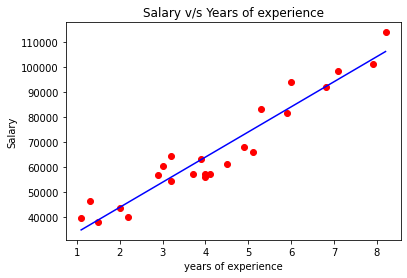

In [33]:
plt.scatter(x_train_vals,list(Y_train[0]*inverse_cache[2]+inverse_cache[3]), color='r')
plt.plot(x_train_vals, y_train_vals, color='b')
plt.title('Salary v/s Years of experience')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

In [34]:
predictions = predict(X_test, params, inverse_cache)
predictions

array([[111119.04714624, 114134.88022524, 119161.26869024,
        120166.54638324, 127203.49023424, 129214.04562024]])

In [35]:
Y_test = Y_test*inverse_cache[2]+inverse_cache[3]

In [36]:
y_orig = []
y_orig = [list(Y_test[0])]
y_orig

[[109431.0, 105582.0, 116969.0, 112635.0, 122391.0, 121872.0]]

In [37]:
y_pred = [list(predictions[0])]
y_pred

[[111119.0471462415,
  114134.88022524094,
  119161.26869023999,
  120166.54638323978,
  127203.49023423847,
  129214.04562023809]]

In [38]:
print(np.concatenate((y_orig, y_pred),0))

[[109431.         105582.         116969.         112635.
  122391.         121872.        ]
 [111119.04714624 114134.88022524 119161.26869024 120166.54638324
  127203.49023424 129214.04562024]]


In [39]:
def single_pred(X,params=params,inverse_cache=inverse_cache):
  X = (X-inverse_cache[1])/inverse_cache[0]
  Z = params['W']*X+params['b']
  Z = Z*inverse_cache[2] + inverse_cache[3]
  return Z

In [40]:
single_pred(2)

array([[43765.44171525]])